## Data Audit - Tweets

@Apple hasn't posted any tweet yet, so we are going to look at tweets from @realDonaldTrump in this notebook. 
Additionally, there hasn't been any mention of @Apple in other user's tweets.

Let's get the data from BigQuery, since it's not that big.

In [4]:
import google.cloud.bigquery as bq
import pandas as pd

client = bq.Client()
sql = """
    SELECT * FROM `test-project-datalab-225214.AAPL.tweets_realdonaldtrump`
"""
tweets_data = client.query(sql).to_dataframe()

print("There are {} rows.".format(len(tweets_data)))
tweets_data.head()

There are 400 rows.


,name,location,retweet_count,hashtags,created_at,text,screen_name
0,Donald J. Trump,"Washington, DC",10273,[],Sun Apr 07 22:02:04 +0000 2019,....I am pleased to announce that Kevin McAlee...,realDonaldTrump
1,Donald J. Trump,"Washington, DC",10516,[],Sun Apr 07 22:02:03 +0000 2019,Secretary of Homeland Security Kirstjen Nielse...,realDonaldTrump
2,Donald J. Trump,"Washington, DC",7844,[],Sun Apr 07 19:54:53 +0000 2019,RT @mike_pence: .@RealDonaldTrump is doing his...,realDonaldTrump
3,Donald J. Trump,"Washington, DC",11164,[],Sun Apr 07 19:53:56 +0000 2019,"RT @mike_pence: The last 2 years, under @RealD...",realDonaldTrump
4,Donald J. Trump,"Washington, DC",14937,[],Sun Apr 07 19:50:54 +0000 2019,Pleased to report that the American tourist an...,realDonaldTrump


In [98]:
df = tweets_data.copy(deep=True)
#making sure to use the timestamp as index
df["created_at"] = pd.to_datetime(df["created_at"])
df.index = df["created_at"]
del df["created_at"]
df.head()

,name,location,retweet_count,hashtags,text,screen_name
created_at,,,,,,
2019-04-07 22:02:04+00:00,Donald J. Trump,"Washington, DC",10273,[],....I am pleased to announce that Kevin McAlee...,realDonaldTrump
2019-04-07 22:02:03+00:00,Donald J. Trump,"Washington, DC",10516,[],Secretary of Homeland Security Kirstjen Nielse...,realDonaldTrump
2019-04-07 19:54:53+00:00,Donald J. Trump,"Washington, DC",7844,[],RT @mike_pence: .@RealDonaldTrump is doing his...,realDonaldTrump
2019-04-07 19:53:56+00:00,Donald J. Trump,"Washington, DC",11164,[],"RT @mike_pence: The last 2 years, under @RealD...",realDonaldTrump
2019-04-07 19:50:54+00:00,Donald J. Trump,"Washington, DC",14937,[],Pleased to report that the American tourist an...,realDonaldTrump


Let's check if there are duplicate entries.

In [99]:
df = df[~df.index.duplicated(keep='first')]

In [100]:
len(df)

201

It looks like we had some duplicated data.

Let's see if there are tweets were hashtags were used

In [101]:
df['num_hashtags'] = df['hashtags'].str.count("/") + 1

Let's check all null/None values.

In [102]:
df.isna().sum()

name               0
location           0
retweet_count      0
hashtags           0
text               0
screen_name        0
num_hashtags     201
dtype: int64

It looks like there are no hashtags on Trump's tweets (in our data at least)

In [103]:
df = df.drop(['hashtags','num_hashtags'], axis=1)

Ok, so now that we got rid of duplicate data and unnecessary fields, let's do some analysis.

## Data Analysis - Tweets

Let's see how many tweets per day is posted by Trump

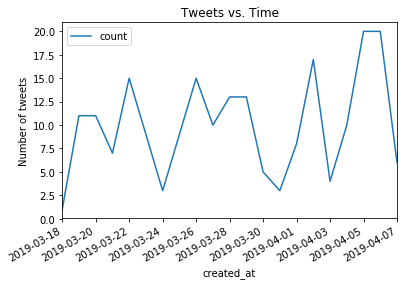

In [54]:
import matplotlib.pyplot as plt
daily_data = df.groupby(df.index.floor('d')).size().reset_index(name='count')
daily_data.plot(y='count', x='created_at')
plt.ylabel('Number of tweets')
plt.title('Tweets vs. Time')
plt.show()

There doesn't appear to be a pattern in the number of tweets that are posted over time.

Let's see if there is the day of the week has any relevance to how many tweets are posted.

In [85]:
weekday_df = df.copy(deep=True)
weekday_df['day_of_week'] = df.index.day_name()
weekday_df.head()

,name,location,retweet_count,text,screen_name,day_of_week
created_at,,,,,,
2019-04-07 22:02:04+00:00,Donald J. Trump,"Washington, DC",10273,....I am pleased to announce that Kevin McAlee...,realDonaldTrump,Sunday
2019-04-07 22:02:03+00:00,Donald J. Trump,"Washington, DC",10516,Secretary of Homeland Security Kirstjen Nielse...,realDonaldTrump,Sunday
2019-04-07 19:54:53+00:00,Donald J. Trump,"Washington, DC",7844,RT @mike_pence: .@RealDonaldTrump is doing his...,realDonaldTrump,Sunday
2019-04-07 19:53:56+00:00,Donald J. Trump,"Washington, DC",11164,"RT @mike_pence: The last 2 years, under @RealD...",realDonaldTrump,Sunday
2019-04-07 19:50:54+00:00,Donald J. Trump,"Washington, DC",14937,Pleased to report that the American tourist an...,realDonaldTrump,Sunday


In [86]:
weekday = weekday_df.groupby(weekday_df.day_of_week).size().reset_index(name='count')
weekday

,day_of_week,count
0,Friday,48
1,Monday,18
2,Saturday,25
3,Sunday,12
4,Thursday,30
5,Tuesday,43
6,Wednesday,25


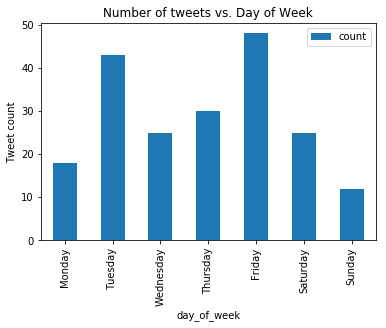

In [88]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday['day_of_week'] = pd.Categorical(weekday['day_of_week'], categories=cats, ordered=True)
weekday = weekday.sort_values('day_of_week')
weekday.plot(y = "count", x="day_of_week",kind='bar')
plt.title('Number of tweets vs. Day of Week')
plt.ylabel('Tweet count')
plt.show()


There doesn't seem to be a strong relationship between day of week and the number of tweets that Trump has posted.

Let's take a look at the location from where the tweets were posted.

In [89]:
df['location'].nunique()

1

It seems that Trump has only sent tweets from one location (Washington, DC)

Let's now have a look at the number of retweets.

/Users/antsar/.conda/envs/MoovAI/lib/python2.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


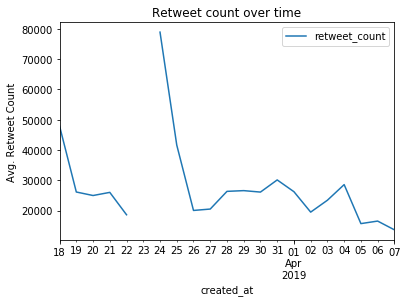

In [93]:
retweets = df.groupby(pd.Grouper(freq='D')).mean()
retweets.plot()
plt.title('Retweet count over time')
plt.ylabel('Avg. Retweet Count')
plt.show()

It looks like there was no retweet for March 23rd, and a lot of retweets for March 24th. Let's look at the tweets sent on March 24th.

In [106]:
df['2019-03-24']

,name,location,retweet_count,text,screen_name
created_at,,,,,
2019-03-24 20:42:19+00:00,Donald J. Trump,"Washington, DC",95958,"No Collusion, No Obstruction, Complete and Tot...",realDonaldTrump
2019-03-24 12:02:59+00:00,Donald J. Trump,"Washington, DC",63336,MAKE AMERICA GREAT AGAIN!,realDonaldTrump
2019-03-24 12:01:44+00:00,Donald J. Trump,"Washington, DC",77555,"Good Morning, Have A Great Day!",realDonaldTrump


It looks like the retweets were most likely related to the outcome of the Mueller report regarding Trumps' collusion with Russia during the 2016 elections.

In [107]:
df.head()

#look at word frequency

,name,location,retweet_count,text,screen_name
created_at,,,,,
2019-04-07 22:02:04+00:00,Donald J. Trump,"Washington, DC",10273,....I am pleased to announce that Kevin McAlee...,realDonaldTrump
2019-04-07 22:02:03+00:00,Donald J. Trump,"Washington, DC",10516,Secretary of Homeland Security Kirstjen Nielse...,realDonaldTrump
2019-04-07 19:54:53+00:00,Donald J. Trump,"Washington, DC",7844,RT @mike_pence: .@RealDonaldTrump is doing his...,realDonaldTrump
2019-04-07 19:53:56+00:00,Donald J. Trump,"Washington, DC",11164,"RT @mike_pence: The last 2 years, under @RealD...",realDonaldTrump
2019-04-07 19:50:54+00:00,Donald J. Trump,"Washington, DC",14937,Pleased to report that the American tourist an...,realDonaldTrump


In [167]:
tweets = df['text'].values
tweets = ','.join(tweets)

Let's remove all links in the text.

In [170]:
import re
tweets = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', tweets)
tweets = tweets.split(' ')

Let's also remove stop words in our tweets

In [165]:
import nltk
from nltk.corpus import stopwords
stop_words = nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antsar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [199]:
words=[]
for word in tweets:
    if word not in stop_words:
        words.append(word)

In [200]:
from collections import Counter
keys = Counter(words).keys() # equals to list(set(words))
frequency = Counter(words).values() # counts the elements' frequency

In [219]:
word_count = pd.DataFrame(data=[keys, frequency]).T
word_count.columns=['word', 'count']
word_count = word_count[word_count.word != '']
word_count.head()

,word,count
1,JOE!,1
2,Heights,1
3,increase,1
4,"196,000",1
5,"Economist,",1


In [220]:
word_count.dtypes
word_count["count"] = pd.to_numeric(word_count["count"])

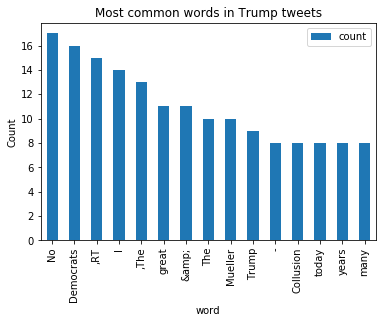

In [223]:
common = word_count.nlargest(15, ['count'])

common.plot(x='word', y='count', kind='bar')
plt.title('Most common words in Trump tweets')
plt.ylabel('Count')
plt.show()

It seems that some stop words like "I, The" were not removed. I am not sure why that is...
However, it seems that the most common word in Trump's tweets is "No".

## Summary and Insights on Tweets data

### Data Audit

1. There were duplicates in our data.
2. Trump hasn't used any hashtags. 

### Data Analysis
1. The number of tweets posted by Trump fluctuates a lot over time.
2. There seem to be less tweets overall being posed by Trump on Monday and Sunday.
3. Spike in number of retweets is associated with the Mueller report outcome.
4. Most common word in the tweets is 'No'.